In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from pandas import DataFrame

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [38]:
data = pd.read_csv('winequality-red.csv', sep = ';')

1.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [39]:
y = data.quality
X = data.drop(columns='quality')

learn_df, test_df, learn_y, test_y = train_test_split(X, y, test_size=0.3)


2.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [40]:
tree_classifier_model = DecisionTreeClassifier()
tree_classifier_model.fit(learn_df, learn_y)
tree_classifier_predict = tree_classifier_model.predict(test_df)
tree_accuracy = accuracy_score(test_y, tree_classifier_predict)
print('Accuracy for DecisionTreeClassifier: ', tree_accuracy)

Accuracy for DecisionTreeClassifier:  0.6


In [41]:
bc_with_trees = BaggingClassifier(base_estimator=tree_classifier_model, n_estimators=100)
bc_with_trees.fit(learn_df, learn_y)
bc_with_trees_predict = bc_with_trees.predict(test_df)
bc_with_trees_accuracy = accuracy_score(test_y, bc_with_trees_predict)
print('Accuracy for BaggingClassifier with 100 trees: ', bc_with_trees_accuracy)

Accuracy for BaggingClassifier with 100 trees:  0.6625


In [42]:
def get_random_forest_accuracy_with_n_trees(trees_count:int):
    random_forest_model = RandomForestClassifier(n_estimators=trees_count)
    random_forest_model.fit(learn_df, learn_y)
    random_forest_predict = random_forest_model.predict(test_df)
    random_forest_accuracy = accuracy_score(test_y, random_forest_predict)
    return random_forest_accuracy

random_forest_accuracy = get_random_forest_accuracy_with_n_trees(100)

print('Accuracy for RandomForestClassifier with n_estimators=100: ', random_forest_accuracy)

Accuracy for RandomForestClassifier with n_estimators=100:  0.71875


Вывод: Bagging дает лучшие результаты, чем простое применение DecisionTreeClassifier,
однако RandomForestClassifier, использующий внутри тот же DecisionTreeClassifier дает ещё лучшие результаты

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [72]:
accuracy_by_n = DataFrame(columns=['n_trees', 'accuracy'])

for a in range(1,25):
    current_model = RandomForestClassifier(n_estimators=a*200)
    current_n = a*200
    current_accuracy = get_random_forest_accuracy_with_n_trees(current_n)
    row_df = DataFrame.from_dict({'n_trees': [current_n], 'accuracy': [current_accuracy]})
    accuracy_by_n = pd.concat([accuracy_by_n, row_df])
accuracy_by_n = accuracy_by_n.reset_index(drop=True)
accuracy_by_n = accuracy_by_n.set_index('n_trees')
accuracy_by_n.head()

    

/Users/max/git/github/ds-practise/ds-practise/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,accuracy
n_trees,
200,0.708333
400,0.702083
600,0.702083
800,0.708333
1000,0.706250


<AxesSubplot: xlabel='n_trees'>

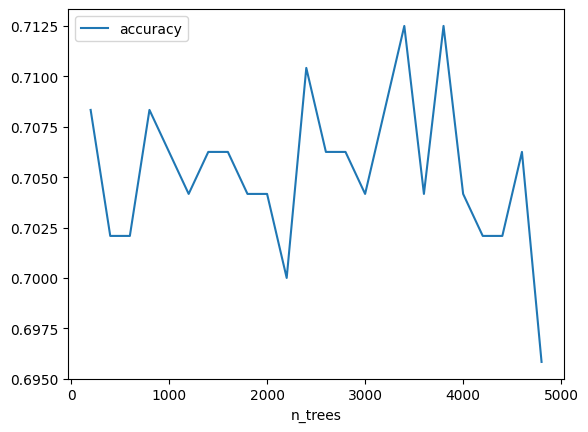

In [73]:
accuracy_by_n.plot()



4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов.
Сравните значение метрики accuracy и скорость по этим четырем реализациям.

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.